## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(merge_data["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse=merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
test=merge_data[merge_data["Mouse ID"]== 'g989'] 
clean_df = merge_data[merge_data["Mouse ID"].isin(duplicate_mouse)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse_Count=len(clean_df["Mouse ID"].unique())
Mouse_Count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Get SStat for Tumor Volume

tumor_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=tumor_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=tumor_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=tumor_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=tumor_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=tumor_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"mean tv":mean,"median tv":median,"variance":variance, "SD": sd, "SEM": sem})

analysis_df=analysis_df.round(2)

analysis_df


,mean tv,median tv,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

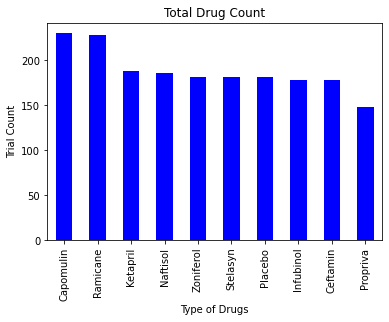

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index
drug_counts.plot(kind="bar", facecolor='blue',)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_counts= clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=np.arange(len(regimen_data_points))
x_drugs=drug_counts.index
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()

NameError: name 'np' is not defined

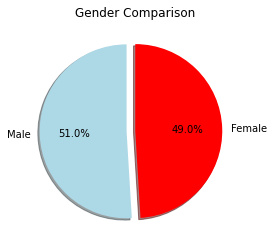

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_count=clean_df["Sex"].value_counts()
labels=mf_count.index
sizes=mf_count.values
colors=["lightblue", "red"]
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.show()

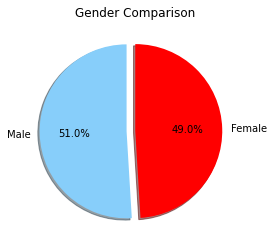

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=clean_df["Sex"].value_counts()
labels=mf_count.values
sizes=mf_count.values
colors=["lightskyblue", "red"]
explode=[0.1,0]
mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show() 


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2)

# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"Any number below {round(lower_ocap, 2)} is considered an outlier")
print(f"Any number above {round(upper_ocap, 2)} is considered an outlier")

quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Any number below {round(lower_oram, 2)} is considered an outlier")
print(f"Any number above {round(upper_oram, 2)} is considered an outlier")

quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_oin, 2)} is considered an outlier")
print(f"Any number above {round(upper_oin, 2)} is considered an outlier")

quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_oce, 2)} is considered an outlier")
print(f"Any number above {round(upper_oce, 2)} is considered an outlier")
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier
Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier
Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier
Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

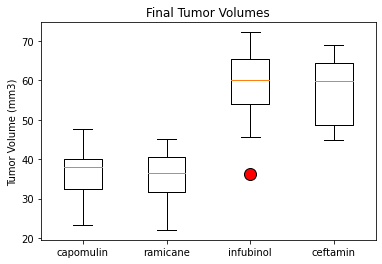

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

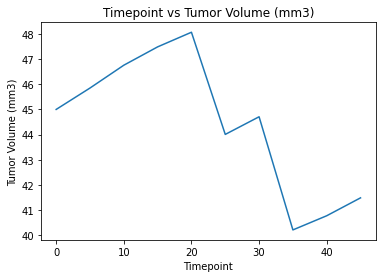

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

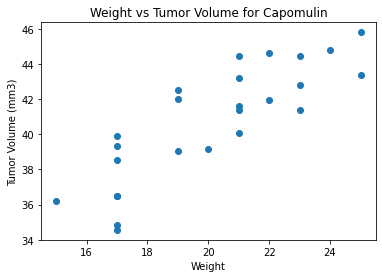

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()



NameError: name 'linregress' is not defined

In [18]:
print(f"Correlation between these two variables is {round(rvalue,2)}") 

NameError: name 'rvalue' is not defined